PART A

In [14]:
import pandas as pd

In [15]:
crowdfund = pd.read_csv("ks-projects-sample.csv")
#importing data

In [16]:
crowdfund.head(10)
#viewing data

,name,category,main_category,currency,start,end,year,goal,pledged,backers
0,"HELIO: Incredible Brightness, Ultra Lightness.",Design,Design,USD,5/3/17,7/2/17,2017,10000,68033.0,1225
1,Artist Residency @ Vermont Studio Center,Painting,Art,USD,2/20/13,3/22/13,2013,1500,2173.0,21
2,ARTSi - Complete Your iPad 2 / New iPad Painti...,Product Design,Design,USD,7/11/12,8/30/12,2012,53000,348.0,11
3,Sidereal Calendar Year 413: Kemetic Societies ...,Publishing,Publishing,USD,8/15/13,8/26/13,2013,5500,5965.0,100
4,Unseen world of Colorado,Photography,Photography,USD,5/10/14,5/31/14,2014,5000,0.0,0
5,"Kilduff's painted encyclopedia of idioms,puns ...",Art Books,Publishing,USD,3/18/16,4/17/16,2016,2500,3497.0,53
6,The Anti-Valentine's Day Card,Comedy,Publishing,USD,1/24/17,2/2/17,2017,7000,0.0,0
7,The Shadow of the Gauntlet,Fiction,Publishing,USD,12/3/12,1/2/13,2013,6000,7035.0,109
8,Voiceless,Film & Video,Film & Video,USD,10/24/16,11/14/16,2016,600,620.0,9
9,Student IDeals: Get more when you go out!,Apps,Technology,USD,5/12/14,6/26/14,2014,25000,25797.0,119


In [17]:
crowdfund['Date'] = pd.to_datetime(crowdfund['end'])
#convert string date to datetime
crowdfund['Year'] = pd.DatetimeIndex(crowdfund['end']).year
#adding a year column for the groupby 
crowdfund.head()

,name,category,main_category,currency,start,end,year,goal,pledged,backers,Date,Year
0,"HELIO: Incredible Brightness, Ultra Lightness.",Design,Design,USD,5/3/17,7/2/17,2017,10000,68033.0,1225,2017-07-02,2017
1,Artist Residency @ Vermont Studio Center,Painting,Art,USD,2/20/13,3/22/13,2013,1500,2173.0,21,2013-03-22,2013
2,ARTSi - Complete Your iPad 2 / New iPad Painti...,Product Design,Design,USD,7/11/12,8/30/12,2012,53000,348.0,11,2012-08-30,2012
3,Sidereal Calendar Year 413: Kemetic Societies ...,Publishing,Publishing,USD,8/15/13,8/26/13,2013,5500,5965.0,100,2013-08-26,2013
4,Unseen world of Colorado,Photography,Photography,USD,5/10/14,5/31/14,2014,5000,0.0,0,2014-05-31,2014


In [18]:
cf_group = crowdfund.groupby('Year')

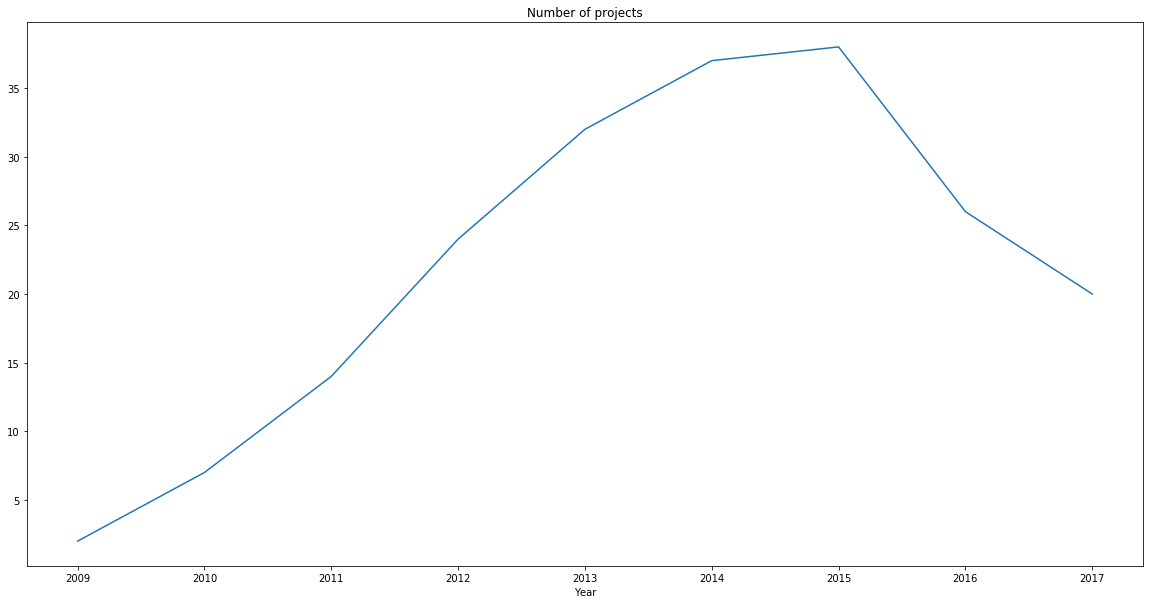

In [19]:
cf_group['pledged'].count().plot(figsize=(20,10),title='Number of projects')
#reconfigured chart size

Between 2009 and 2017, the number of projects peaks at 2015 at around 40 projects and then curves down, indicating a slowdown in the number of projects.

PART B

In [20]:
crowdfund['pledged'].describe()

count       200.000000
mean       6258.928750
std       13830.669501
min           0.000000
25%          47.750000
50%         918.045000
75%        6034.760000
max      119321.000000
Name: pledged, dtype: float64

In [21]:
crowdfund['goal'].describe()


count    2.000000e+02
mean     3.453593e+04
std      2.250444e+05
min      5.000000e+00
25%      2.500000e+03
50%      6.000000e+03
75%      1.425000e+04
max      3.000000e+06
Name: goal, dtype: float64

In [22]:
crowdfund['backers'].describe()

count     200.000000
mean       76.295000
std       192.529102
min         0.000000
25%         2.000000
50%        15.000000
75%        68.000000
max      2004.000000
Name: backers, dtype: float64

PART C

In [23]:
crowdfund['success'] = (crowdfund.pledged >= crowdfund.goal)
crowdfund.head()

,name,category,main_category,currency,start,end,year,goal,pledged,backers,Date,Year,success
0,"HELIO: Incredible Brightness, Ultra Lightness.",Design,Design,USD,5/3/17,7/2/17,2017,10000,68033.0,1225,2017-07-02,2017,True
1,Artist Residency @ Vermont Studio Center,Painting,Art,USD,2/20/13,3/22/13,2013,1500,2173.0,21,2013-03-22,2013,True
2,ARTSi - Complete Your iPad 2 / New iPad Painti...,Product Design,Design,USD,7/11/12,8/30/12,2012,53000,348.0,11,2012-08-30,2012,False
3,Sidereal Calendar Year 413: Kemetic Societies ...,Publishing,Publishing,USD,8/15/13,8/26/13,2013,5500,5965.0,100,2013-08-26,2013,True
4,Unseen world of Colorado,Photography,Photography,USD,5/10/14,5/31/14,2014,5000,0.0,0,2014-05-31,2014,False


In [24]:
sum(crowdfund.success == True)
#count the number of successful crowdfunds

83

There were 83 successful projects that met or exceeded their goal.

PART D

d) calculate the success rate over different years, plot the fraction of successful projects in each
year. Do you see any trend? [3 points]

In [28]:
crowdfund.success.mean()
# calculate success rate

0.415

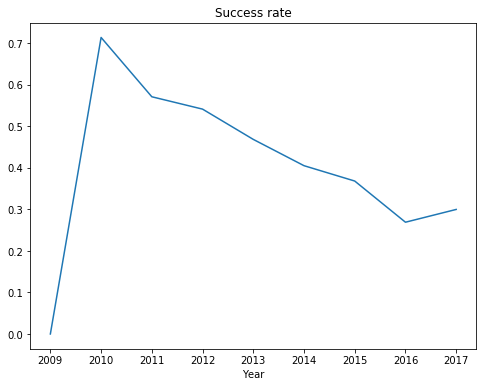

In [31]:
cf_group['success'].mean().plot(figsize=(8,6),title='Success rate')
# Plot success rate by year

As the years go on, the success rate has dropped creating a negative trend. The exception to this being an increase from 2016 to 2017, which may indicate a current positive trend in 2020. However, we would need data from 2018 and 2019 to see if the negative trend has truly changed.